In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv('steam.csv')

In [19]:
games

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [20]:
def changeYearInfo(games):
    
    games['release_date'] = pd.to_datetime(games['release_date']).dt.year

In [21]:
changeYearInfo(games)
games

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [22]:
def categories_count(games,col):
    '''
    games is a pd.DataFrame object with all infomation,
    extract either the genres or category column to know how many games in each catergory
    values in each contains semicolon, separate values by comma and count their occurence
    and output as a pd.dataframe
    :param x: pd.DataFrame
    :return: pd.DataFrame
    '''
    
    assert isinstance(games,pd.DataFrame)
    assert isinstance(col,str)
    assert col == 'categories' or col == 'genres'
    x = games[col]
    assert isinstance(x, pd.Series)

    s= x.str.split(r";",expand = True)
    vals = s.apply(pd.value_counts).sum(axis=1,).sort_values(ascending=True).to_frame()
    vals.columns = ["Num of Games"]
    vals.index.name = col

    return vals


Text(0.5, 1.0, 'Game Genres and Num of Games in each Game Genre')

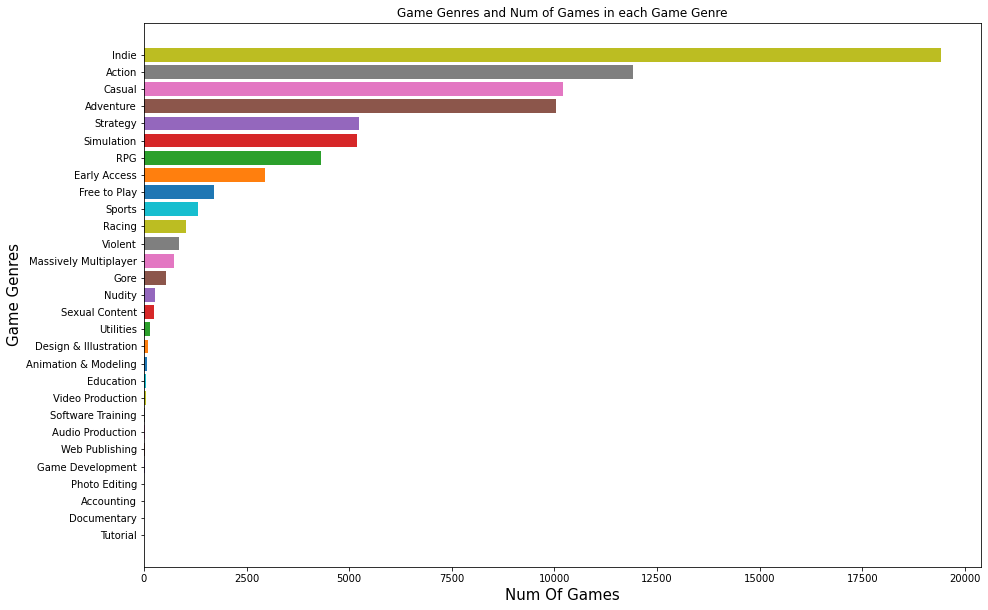

In [23]:
plt.figure(figsize=(15,10))

for name in cat.index:
    plt.barh(name, cat['Num of Games'][name], label=name, align='center')
    
plt.xlabel('Num Of Games',size=15)
plt.ylabel('Game Genres',size=15)
plt.title('Game Genres and Num of Games in each Game Genre')

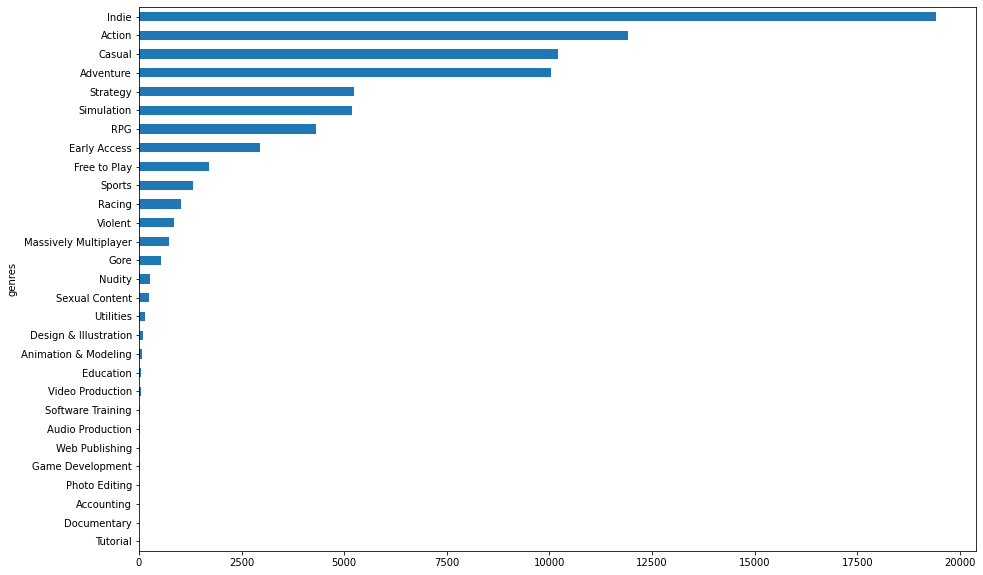

In [17]:
cat = categories_count(games,'genres')
cat.plot.barh(legend = False,figsize = (15,10))

In [6]:
def count_owners(games,col):
    
    
    '''
    games is a pd.DataFrame object with all infomation,
    extract either the genres or category column to know how many games in each catergory
    values in each contains semicolon, separate values by comma and count their occurence,
    also, count 
    :param x: pd.DataFrame
    :return: pd.DataFrame
    '''
    
    assert isinstance(games,pd.DataFrame)
    assert isinstance(col,str)
    assert col == 'categories' or col == 'genres'
    x = games[col]
    assert isinstance(x, pd.Series)
    
    
    s= games[col].str.split(r";",expand = True)
    vals = s.apply(pd.value_counts).sum(axis=1,).sort_values(ascending=True).to_frame()
    vals.columns = ["Num of Games"]
    vals.index.name = col
    
    users= games['owners'].str.split(r"-",expand = True)
    users = users.astype(int)
    users['owner_mean'] = (users[0]+users[1])//2
    
    counts = dict.fromkeys(list(vals.index),0)
    
    for i in list(s.columns):
        for key in counts.keys():
            counts[key]+=users['owner_mean'][s[i]== key].sum()

    vals['owner']=vals.index.map(counts)
    return vals
    

In [7]:
count_owners(games,'categories')

,Num of Games,owner
categories,,
Mods (require HL2),1.0,750000
Mods,2.0,1500000
Includes Source SDK,35.0,131225000
SteamVR Collectibles,40.0,154720000
Steam Turn Notifications,63.0,4635000
Valve Anti-Cheat enabled,94.0,581645000
Commentary available,144.0,143820000
VR Support,231.0,85625000
MMO,421.0,307020000


In [14]:
def average_rating(game,col):
    
    '''
    games is a pd.DataFrame object with all infomation,
    extract either the genres or category column to know how averagge games, positive ratings,
    neggative ratings, prices, and owners, in each catergory
    categories/genere data semicolon, separate values by comma and count their occurence,
    
    :param x: pd.DataFrame
    :param col: str, either categorize data base on genres or categories
    :return: pd.DataFrame
    '''
    
    assert isinstance(game,pd.DataFrame)
    assert isinstance(col,str)
    assert col == 'categories' or col == 'genres'
    x = game[col]
    assert isinstance(x, pd.Series)
    
    games = game.copy()
    columns = ['positive_ratings','negative_ratings','average_playtime','price','owners']
    
    users= games['owners'].str.split(r"-",expand = True)
    users = users.astype(int)
    games['owners'] = (users[0]+users[1])//2
    
    s= games[col].str.split(r";",expand = True)
    vals = s.apply(pd.value_counts).sum(axis=1,).sort_values(ascending=True).to_frame()
    vals.columns = ["Num of Games"]
    vals.index.name = col
    
    for column in columns:
        temp = games[column].astype(int)
        counts = dict.fromkeys(list(vals.index),0)
        
        for i in list(s.columns):
            
            for key in counts.keys():
                tempInfo = temp[s[i]== key]
                counts[key]+=tempInfo.sum()
            
            
        vals[column]=vals.index.map(counts)/vals['Num of Games']
    
    return vals

        

In [22]:
info = average_rating(games,'genres')
info

,Num of Games,positive_ratings,negative_ratings,average_playtime,price,owners
genres,,,,,,
Tutorial,1.0,1.000000,1.000000,0.000000,3.000000,10000.000000
Documentary,1.0,1.000000,1.000000,0.000000,3.000000,10000.000000
Accounting,6.0,6.500000,4.166667,0.000000,2.666667,14166.666667
Photo Editing,12.0,84.000000,30.916667,429.583333,14.083333,33333.333333
Game Development,17.0,102.235294,37.529412,116.000000,61.000000,39705.882353
Web Publishing,28.0,338.892857,50.750000,136.214286,39.035714,75892.857143
Audio Production,29.0,47.482759,15.620690,2.241379,10.586207,14827.586207
Software Training,31.0,98.677419,36.741935,9.741935,31.258065,35806.451613
Video Production,38.0,542.710526,68.394737,26.973684,10.789474,78815.789474


In [23]:
info_corr = info.corr()

<Figure size 1080x1080 with 0 Axes>

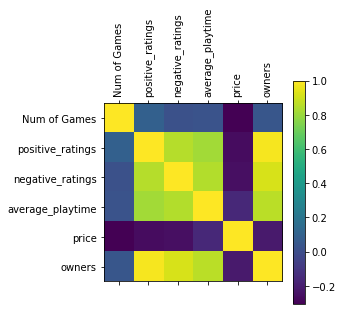

In [80]:
plt.figure(figsize = (15,15))
plt.matshow(info_corr)
plt.xticks(range(len(info.columns)), info.columns, rotation=90)
plt.yticks(range(len(info.columns)), info.columns)

plt.colorbar(corrMat)